<a href="https://colab.research.google.com/github/ahzaidy/Programs/blob/main/CPSC_5410_HW2_P3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

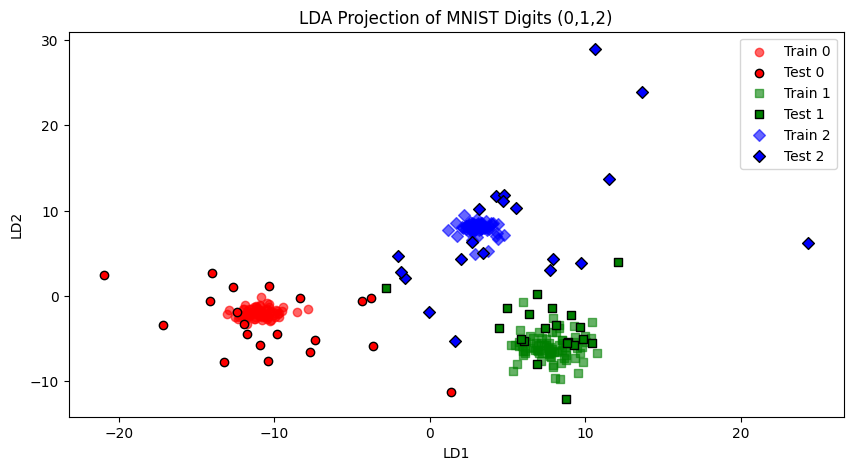

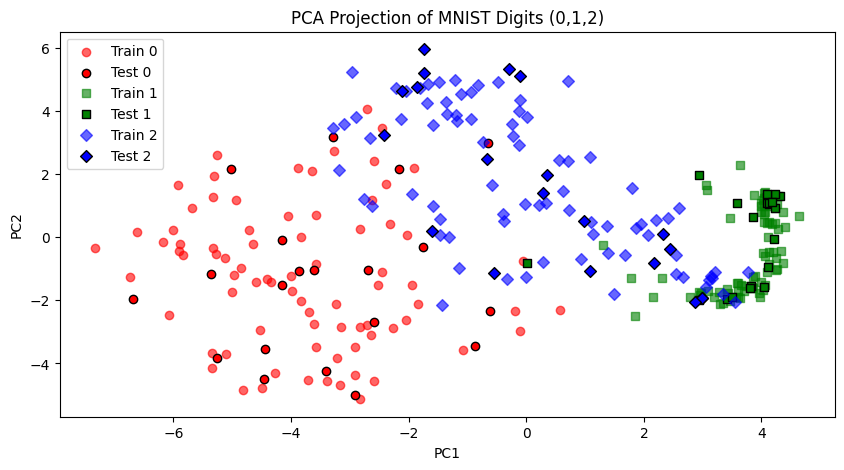

LDA can project data into at most (cls-1) dimensions, where cls is the number of classes.
Since we have 3 classes (0,1,2), the maximum dimension for LDA is 2 (3-1). Thus, LDA cannot project to 3D space.


In [1]:
###############################################################################
#Author: Arif H. Zaidy                                                        #
#Date: March 10, 2025                                                         #
#Course: CPSC 5410                                                            #
#Topic: Assignment 2, Question 3                                              #
#Description:                                                                 #
#This program performs dimensionality reduction on a subset of the MNIST      #
#dataset containing digits 0, 1, and 2. It applies both Linear Discriminant   #
#Analysis (LDA) and Principal Component Analysis (PCA) to visualize the       #
#data in a reduced 2D space. The dataset is split into training (80%) and     #
#testing (20%) while maintaining class balance. Scatter plots are generated to#
#compare LDA and PCA projections. Additionally, the program explains why LDA  #
#cannot project data into 3D space when dealing with three classes.           #
###############################################################################

# Including Python libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.decomposition import PCA

# Load dataset
# The dataset contains MNIST digits 0, 1, and 2.
df = pd.read_csv("https://raw.githubusercontent.com/ahzaidy/Programs/refs/heads/main/MNIST_digits0-1-2.csv")
X = df.iloc[:, :-1].values  # Extract feature matrix (pixel values)
y = df.iloc[:, -1].values   # Extract labels (digit classes)

# Split data into training (80%) and testing (20%) while maintaining class balance
train_indices, test_indices = [], []
for label in np.unique(y):  # Iterate through each unique class (0,1,2)
    indices = np.where(y == label)[0]  # Get indices of samples belonging to the class
    train_idx, test_idx = train_test_split(indices, test_size=0.2, random_state=42)  # Split class data
    train_indices.extend(train_idx)
    test_indices.extend(test_idx)

# Create training and testing datasets
X_train, X_test = X[train_indices], X[test_indices]
y_train, y_test = y[train_indices], y[test_indices]

# Apply Linear Discriminant Analysis (LDA) for dimensionality reduction
lda = LinearDiscriminantAnalysis(n_components=2)  # Reduce to 2D space
X_train_lda = lda.fit_transform(X_train, y_train)  # Fit LDA and transform training data
X_test_lda = lda.transform(X_test)  # Transform test data using the trained LDA model

# Scatter plot to visualize LDA-projected data
plt.figure(figsize=(10, 5))
for label, marker, color in zip([0, 1, 2], ['o', 's', 'D'], ['r', 'g', 'b']):
    # Plot training data points
    plt.scatter(X_train_lda[y_train == label, 0], X_train_lda[y_train == label, 1],
                marker=marker, color=color, alpha=0.6, label=f'Train {label}')
    # Plot testing data points
    plt.scatter(X_test_lda[y_test == label, 0], X_test_lda[y_test == label, 1],
                marker=marker, color=color, edgecolors='k', label=f'Test {label}')

plt.title("LDA Projection of MNIST Digits (0,1,2)")
plt.xlabel("LD1")  # First linear discriminant axis
plt.ylabel("LD2")  # Second linear discriminant axis
plt.legend()
plt.show()

# Apply Principal Component Analysis (PCA) for comparison
pca = PCA(n_components=2)  # Reduce to 2D space
X_train_pca = pca.fit_transform(X_train)  # Fit PCA and transform training data
X_test_pca = pca.transform(X_test)  # Transform test data using the trained PCA model

# Scatter plot to visualize PCA-projected data
plt.figure(figsize=(10, 5))
for label, marker, color in zip([0, 1, 2], ['o', 's', 'D'], ['r', 'g', 'b']):
    # Plot training data points
    plt.scatter(X_train_pca[y_train == label, 0], X_train_pca[y_train == label, 1],
                marker=marker, color=color, alpha=0.6, label=f'Train {label}')
    # Plot testing data points
    plt.scatter(X_test_pca[y_test == label, 0], X_test_pca[y_test == label, 1],
                marker=marker, color=color, edgecolors='k', label=f'Test {label}')

plt.title("PCA Projection of MNIST Digits (0,1,2)")
plt.xlabel("PC1")  # First principal component
plt.ylabel("PC2")  # Second principal component
plt.legend()
plt.show()

# Explanation of LDA's dimensionality constraint
print("LDA can project data into at most (cls-1) dimensions, where cls is the number of classes.")
print("Since we have 3 classes (0,1,2), the maximum dimension for LDA is 2 (3-1). Thus, LDA cannot project to 3D space.")